**Regresión Lineal: Coste de un incidente de seguridad**

**Enunciado**

*El ejercicio consiste en predecir el coste de un accidente de seguridad en base al número de equipos afectados, el conjunto
de datos es generado de manera aleatoria*

**1.Generación del conjunto de datos**

In [12]:
import numpy as np
x = 2*np.random.rand(100,1)
y = 4 + 3*x + np.random.randn(100,1)
print("La longitud del conjunto de datos es:", len(x))

La longitud del conjunto de datos es: 100


**2.Visualización del conjunto de datos**

In [13]:
import matplotlib.pyplot as plt

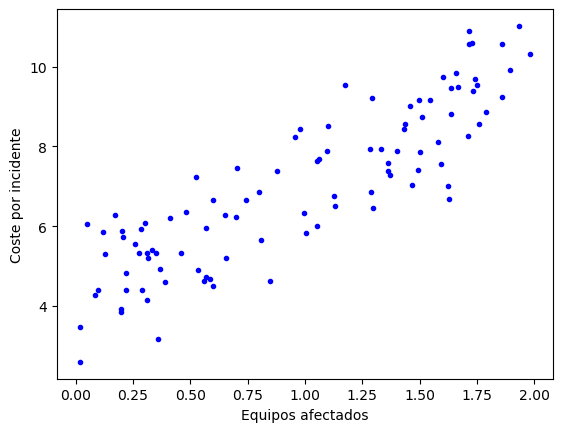

In [10]:
plt.plot(x,y,"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste por incidente")
plt.show()

**3.Modificación del conjunto de datos**

In [14]:
import pandas as pd

In [25]:
#print(x)
data = { "n_equipos_afectados":x.flatten(),"coste":y.flatten()}
df = pd.DataFrame(data)
df.head(3)

,n_equipos_afectados,coste
0,1.556923,8.624036
1,0.527459,6.303522
2,0.439946,7.394467


In [26]:
#Escalado del número de equipos afectados
df["n_equipos_afectados"] = df["n_equipos_afectados"]*1000
df["n_equipos_afectados"] = df["n_equipos_afectados"].astype("int")
#Escalamos el coste
df["coste"] = df["coste"]*1000
df["coste"] = df["coste"].astype("int")

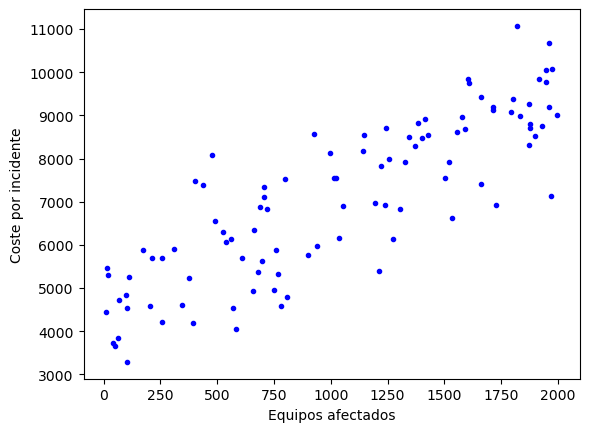

In [27]:
plt.plot(df["n_equipos_afectados"],df["coste"],"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste por incidente")
plt.show()

**4.Construcción del modelo**

In [40]:
from sklearn.linear_model import LinearRegression

In [42]:
#Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()
lin_reg.fit(df["n_equipos_afectados"].values.reshape(-1,1),df["coste"].values)

LinearRegression()

In [43]:
#Parametro theta 0
lin_reg.intercept_

4464.627451605595

In [44]:
#Parametro theta
lin_reg.coef_

array([2.51504285])

In [47]:
x_min_max = np.array([[df["n_equipos_afectados"].min()],[df["n_equipos_afectados"].max()]])
y_train_predict = lin_reg.predict(x_min_max)

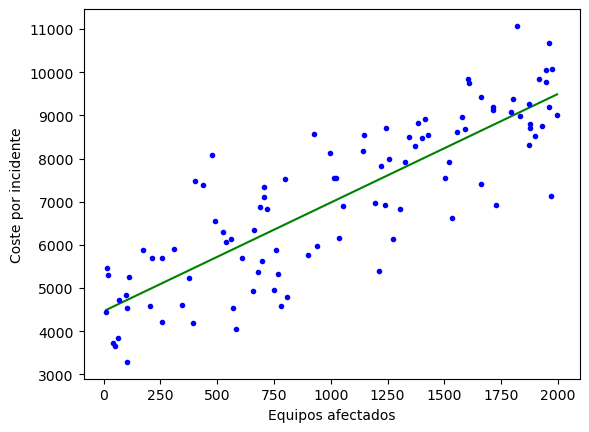

In [49]:
#Representación gráfica de la funciónm hipótesis generada
plt.plot(x_min_max,y_train_predict, "g-")
plt.plot(df["n_equipos_afectados"],df["coste"],"b.")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste por incidente")
plt.show()

**5. Predicción con nuevos ejemplos**

In [54]:
x_new = np.array([[1200]]) #1200 equipos afectados
#predicción del coste que tendría el incidente
coste = lin_reg.predict(x_new)
print("El coste por el incidente sería:",coste[0], "$")

El coste por el incidente sería: 7482.678867895041 $


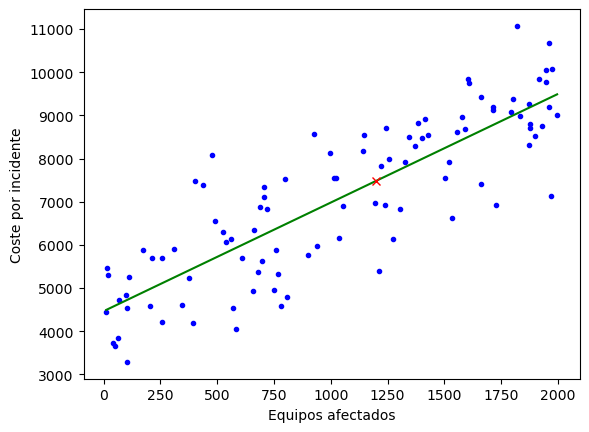

In [55]:
#Representación gráfica de la funciónm hipótesis generada
plt.plot(df["n_equipos_afectados"],df["coste"],"b.")
plt.plot(x_min_max,y_train_predict, "g-")
plt.plot(x_new,coste,"rx")
plt.xlabel("Equipos afectados")
plt.ylabel("Coste por incidente")
plt.show()